# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn

# Download en_core_web_sm for text analytics

## Main Function

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Enter the path here : datasets/setapProduct.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 116 columns and 100 rows

DataFrame Succesfully imported

Index(['year', 'semester', 'timeInterval', 'teamNumber', 'semesterId',
       'teamMemberCount', 'femaleTeamMembersPercent', 'teamLeadGender',
       'teamDistribution', 'teamMemberResponseCount',
       ...
       'standardDeviationUniqueCommitMessagePercentByStudent',
       'averageCommitMessageLengthTotalByStudent',
       'standardDeviationCommitMessageLengthTotalByStudent',
       'averageCommitMessageLengthAverageByStudent',
       'standardDeviationCommitMessageLengthAverageByStudent',
       'averageCommitMessageLengthStandardDeviationByStudent', 'issueCount',
       'onTimeIssueCount', 'lateIssueCount', 'productLetterGrade'],
      dtype='object', length=116)

Enter 'quit' to quit
What would you like to predict? : productLetterGrade
Target Spotted!

Enter 

done ...
		 Replacing commas if present in Currencies
done ...
Object columns present are:  ['year', 'semester', 'timeInterval', 'teamNumber', 'semesterId', 'teamMemberCount', 'femaleTeamMembersPercent', 'teamLeadGender', 'teamDistribution', 'teamMemberResponseCount', 'meetingHoursTotal', 'meetingHoursAverage', 'meetingHoursStandardDeviation', 'inPersonMeetingHoursTotal', 'inPersonMeetingHoursAverage', 'inPersonMeetingHoursStandardDeviation', 'nonCodingDeliverablesHoursTotal', 'nonCodingDeliverablesHoursAverage', 'nonCodingDeliverablesHoursStandardDeviation', 'codingDeliverablesHoursTotal', 'codingDeliverablesHoursAverage', 'codingDeliverablesHoursStandardDeviation', 'helpHoursTotal', 'helpHoursAverage', 'helpHoursStandardDeviation', 'leadAdminHoursResponseCount', 'leadAdminHoursTotal', 'leadAdminHoursAverage', 'leadAdminHoursStandardDeviation', 'globalLeadAdminHoursResponseCount', 'globalLeadAdminHoursTotal', 'globalLeadAdminHoursAverage', 'globalLeadAdminHoursStandardDeviation', 'ave

ERROR: Can not download list of TLDs. (URLError: [Errno 8] nodename nor servname provided, or not known)


No URL columns found

 ### Entering Segregation Zone ### 


#### Entering Segregation ####

There are 85 pure numeric columns
There are 20 categorical numeric columns

The pure numeric columns are Index(['teamNumber', 'femaleTeamMembersPercent', 'teamMemberResponseCount',
       'meetingHoursTotal', 'meetingHoursAverage',
       'meetingHoursStandardDeviation', 'inPersonMeetingHoursTotal',
       'inPersonMeetingHoursAverage', 'inPersonMeetingHoursStandardDeviation',
       'nonCodingDeliverablesHoursTotal', 'nonCodingDeliverablesHoursAverage',
       'nonCodingDeliverablesHoursStandardDeviation',
       'codingDeliverablesHoursTotal', 'codingDeliverablesHoursAverage',
       'codingDeliverablesHoursStandardDeviation', 'helpHoursTotal',
       'helpHoursAverage', 'helpHoursStandardDeviation', 'leadAdminHoursTotal',
       'leadAdminHoursAverage', 'averageResponsesByWeek',
       'averageMeetingHoursTotalByWeek',
       'standardDeviationMeetingHoursTotalByWeek',
       'averageMeetingH

Dropping commitMessageLengthTotal due to high correlation
Dropping averageCommitCountByWeek due to high correlation
Dropping averageCodingDeliverablesHoursTotalByStudent due to high correlation
Dropping inPersonMeetingHoursAverage due to high correlation
Dropping uniqueCommitMessagePercent due to high correlation
Dropping nonCodingDeliverablesHoursAverage due to high correlation
Dropping helpHoursAverage due to high correlation
Dropping meetingHoursAverage due to high correlation
Dropping standardDeviationCommitCountByStudent due to high correlation
Dropping standardDeviationInPersonMeetingHoursTotalByWeek due to high correlation
Dropping standardDeviationInPersonMeetingHoursAverageByWeek due to high correlation
Dropping averageUniqueCommitMessageCountByWeek due to high correlation
Dropping helpHoursStandardDeviation due to high correlation
Dropping leadAdminHoursTotal due to high correlation
Dropping helpHoursTotal due to high correlation
Dropping averageUniqueCommitMessagePercentByWe

  0%|          | 0/10 [00:00<?, ?it/s]

k      0
0    0
1    3
2    0
3    8
4    0
5    0
6    0
7    6
8    0
9    0
10   2
11   0
12   3
13   4
14   0
15   0
16   3
17   0
18   0
19   0
20   0
21   0
22   5
23   0
24   0
25   0
26  13
27   0
28   1
29   0
30   0
31   2
32  18
33   0
34   0
35   0
36  10
37   0
38   0
39   0
40   0
41   0
42   0
43   0
44   0
45   0
46   0
47   0
48   0
49   0
50   0
51   0
52   0
53   0
54  22
55   0
56   0
57   0
58   0
59   0

thresh2: 0.02127659574468085

The final score sheet of 14 selected columns with importances:

                                             col_name  scores2   t/f
54                                         semesterId       22  True
32         averageUniqueCommitMessagePercentByStudent       18  True
26                     averageHelpHoursTotalByStudent       13  True
36  averageCommitMessageLengthStandardDeviationByS...       10  True
3               inPersonMeetingHoursStandardDeviation        8  True
7              averageInPersonMeetingHoursTotalByWeek        6

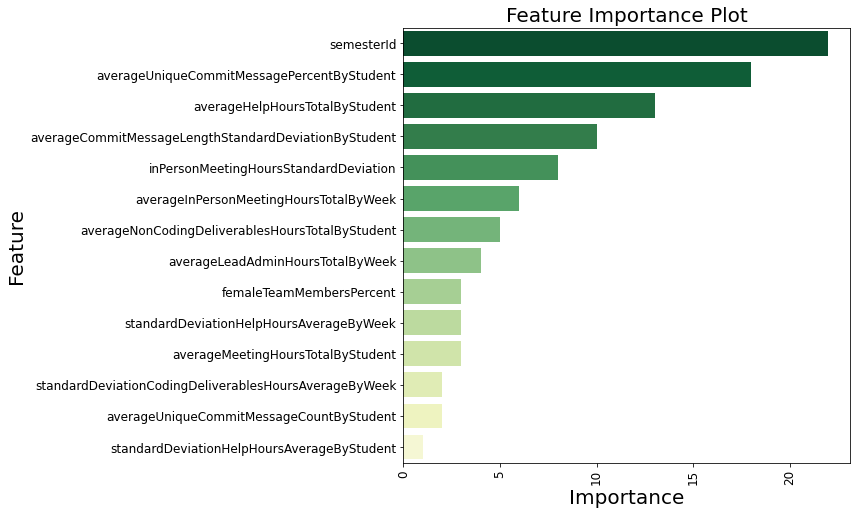

Feature Selection Plot Time taken : 0.4012322425842285
(50, 14)
(50,)

 #### SCALING ####
 #### SCALING DONE ####
(50, 14)
(50,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(50, 14)
(50,)

 #### Printing Sample Equation of the DATA ####

LOGISTIC REGRESSION EQUATION:


ln(odds) = 0.20270476506379137*femaleTeamMembersPercent + 0.5635137390989147*standardDeviationHelpHoursAverageByWeek + 0.33639176863983244*averageLeadAdminHoursTotalByWeek + 0.9325712961327485*averageHelpHoursTotalByStudent + 0.009213863733790413*standardDeviationHelpHoursAverageByStudent + -0.39792417678566583*averageUniqueCommitMessageCountByStudent + -0.4638966730746719*averageUniqueCommitMessagePercentByStudent + -0.0119042810408669*averageCommitMessageLengthStandardDeviationByStudent + -0.2662900578050199

=> odds = exp ( 0.20270476506379137*femaleTeamMembersPercent + 0.5635137390989147*standardDeviationHelpHoursAverageByWeek + 0.33639176863983244*averageLeadAdminHoursTotalByWeek + 0.9325

Pandas Apply:   0%|          | 0/37 [00:00<?, ?it/s]

num_df - (15, 37)
disc_df - (15, 23)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (15, 14)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['femaleTeamMembersPercent', 'inPersonMeetingHoursStandardDeviation',
       'averageInPersonMeetingHoursTotalByWeek',
       'standardDeviationCodingDeliverablesHoursAverageByWeek',
       'standardDeviationHelpHoursAverageByWeek',
       'averageLeadAdminHoursTotalByWeek', 'averageMeetingHoursTotalByStudent',
       'averageNonCodingDeliverablesHoursTotalByStudent',
       'averageHelpHoursTotalByStudent',
       'standardDeviationHelpHoursAverageByStudent',
       'averageUniqueCommitMessageCountByStudent',
       'averageUniqueCommitMessagePercentByStudent

XGB val done
CAT val done
LGBM val done
RF val done
ET val done
Naive Bayes done
LR val done
NN done
SVC val done 
Shape of ModelDF (9, 14)
##Dropping models that behave poorly##
Dropping model XGBoost because of poor performance
this is what you are printing [2 3]
Accuracy : 86.66666666666667
Modelling completed
MODEL SAVED

Total Model Training Time taken : 9.98119592666626
              precision    recall  f1-score   support

           A       0.89      0.89      0.89         9
           F       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

A is present in 9% of the Testing Preview
F is present in 6% of the Testing Preview


File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####

#### TOTAL TIME TAKEN : 45.03650999069214 ####


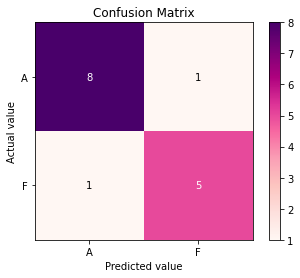

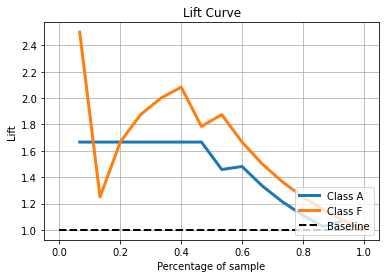

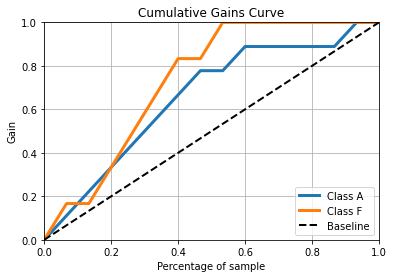

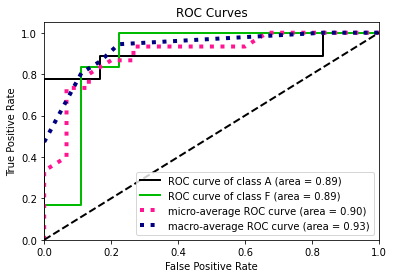

In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df) # If first few rows contains unnecessary info
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
#                 print("Initial columns",df.columns.to_list())
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,S.No,Actual Values,Predicted Values,Class A Probabilities,Class F Probabilities
1,18,A,A,0.66,0.34
2,33,F,F,0.48,0.52
3,14,A,A,0.50,0.50
4,57,F,F,0.10,0.90
5,15,A,A,0.82,0.18
6,17,A,A,0.86,0.14
7,27,F,F,0.39,0.61
8,46,F,A,0.55,0.45
9,10,A,A,0.80,0.20
10,21,A,A,0.95,0.05


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,Precision,Recall,Weighted F1,ROC_AUC_score,Kappa,MCC,KS_statistic,KS_p-value,Total time (hh:mm:ss)
1,Extra Trees Classifier,86.67%,0.867,0.867,0.867,0.861,0.722,0.722,0.000,1.000,00:00:00
2,Ensemble (Random Forest+Extra Trees Classifier),80.00%,0.811,0.800,0.802,0.806,0.595,0.600,0.067,1.000,00:00:00
3,Naive Bayes(Bayesisan Statistics),80.00%,0.800,0.800,0.796,0.778,0.571,0.577,0.067,1.000,00:00:00
4,CatBoost,73.33%,0.764,0.733,0.736,0.750,0.474,0.491,0.133,1.000,00:00:08
5,Logistic Regression,66.67%,0.679,0.667,0.670,0.667,0.324,0.327,0.067,1.000,00:00:00
6,Random Forest,66.67%,0.660,0.667,0.660,0.639,0.286,0.289,0.067,1.000,00:00:00
7,Support Vector Machine,66.67%,0.660,0.667,0.660,0.639,0.286,0.289,0.067,1.000,00:00:00
8,Neural Network,46.67%,0.467,0.467,0.467,0.444,-0.111,-0.111,0.000,1.000,00:00:00
9,Light Gradient Boosting Model,46.67%,0.520,0.467,0.457,0.500,0.000,0.000,0.267,0.678,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
